<a href="https://colab.research.google.com/github/saeeRB/project/blob/main/Supermarket_analysis_sipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (
,
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn.preprocessing import StandardScaler,OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


In [226]:
ms = pd.read_excel("/content/marketing_data.xlsx")

In [227]:
ms.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0


In [228]:
ms.shape

(2240, 22)

In [229]:
ms.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [230]:
ms.duplicated().sum()

0

In [231]:
ms.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<ipython-input-284-a0e2acbe2e1a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ms.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


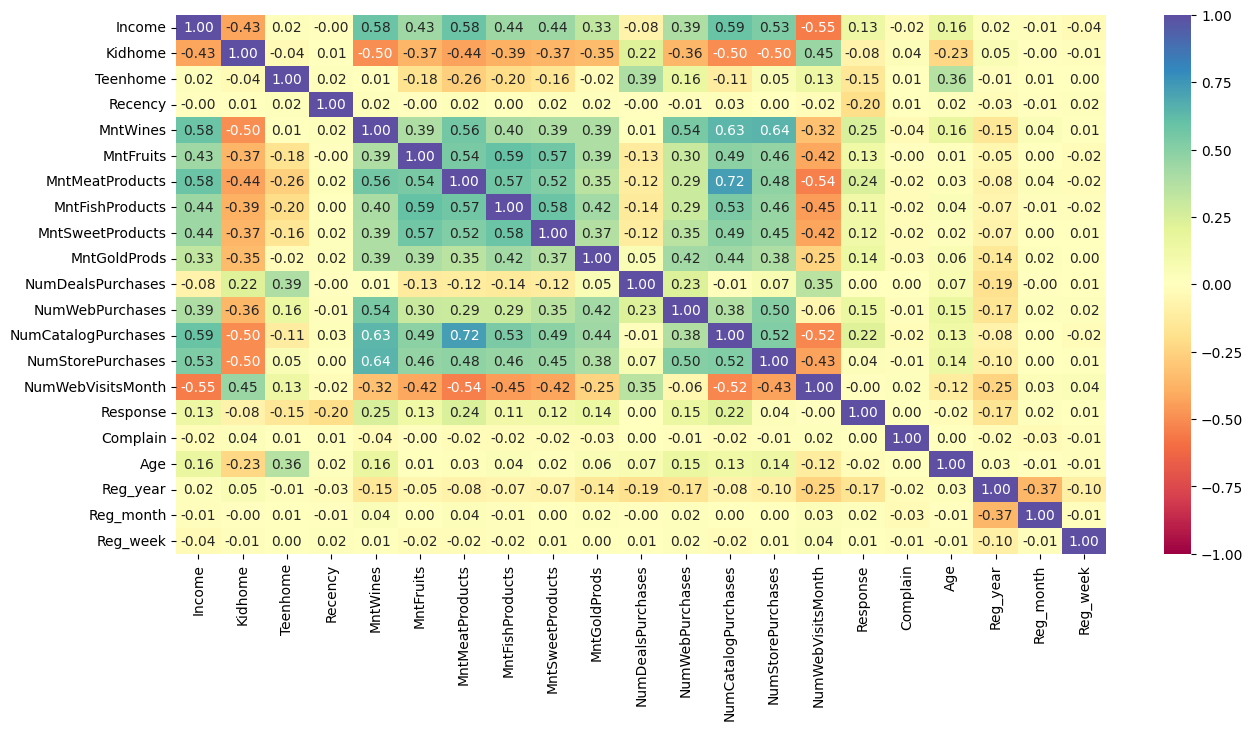

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(ms.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Univariate EDA on Numerical variables


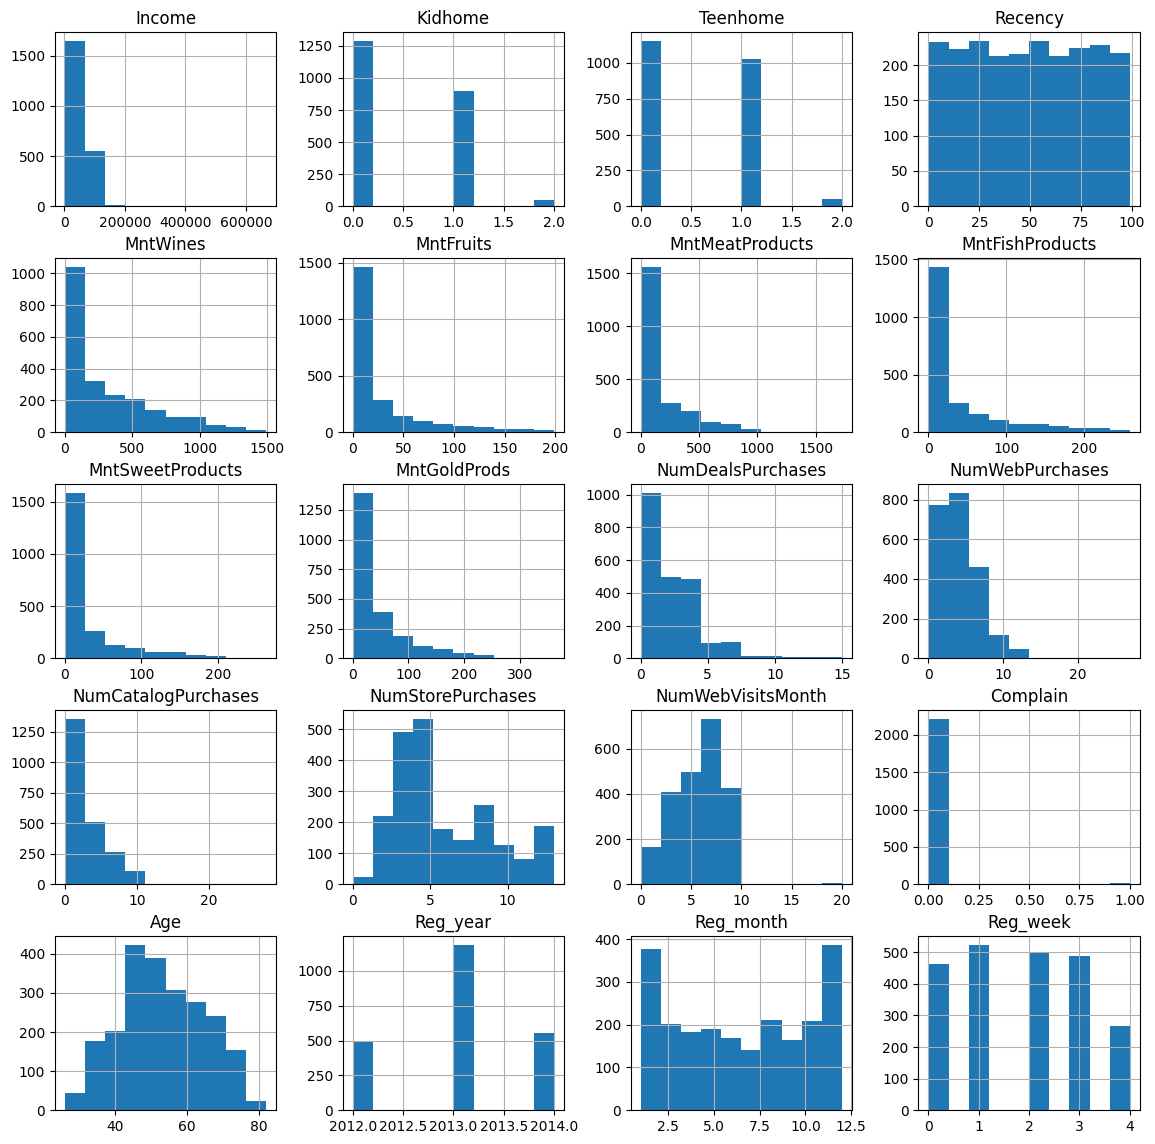

In [286]:


ms[numerical_features].hist(figsize=(14, 14))
plt.show()

In [232]:
ms.drop(columns=["ID"], inplace=True)

In [233]:
ms["Age"] = 2022 - pd.to_datetime(ms["Year_Birth"], format="%Y").apply(
    lambda x: x.year
)

ms["Age"].sort_values()

562      26
1824     26
697      27
1468     27
964      27
       ... 
1740     81
2171     82
2233    122
827     123
513     129
Name: Age, Length: 2240, dtype: int64

In [234]:
ms[ms["Age"] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,...,0,2,1,1,0,2,4,0,0,129
827,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,...,64,224,1,4,6,4,1,0,0,123
2233,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,...,4,25,1,2,1,2,5,0,1,122


In [235]:
ms.drop(ms[ms["Age"] > 100].index, inplace=True)

In [236]:
ms["Dt_Customer"] = pd.to_datetime(ms["Dt_Customer"])

In [237]:
ms.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-11-05
4      2014-08-04
          ...    
2235   2013-07-03
2236   2013-01-22
2237   2012-03-12
2238   2012-11-29
2239   2012-01-09
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [238]:
# Extracting registration year from the date
ms["Reg_year"] = ms["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration quarter from the date
ms["Reg_quarter"] = ms["Dt_Customer"].apply(lambda x: x.quarter)

# Extracting registration month from the date
ms["Reg_month"] = ms["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
ms["Reg_week"] = ms["Dt_Customer"].apply(lambda x: x.day // 7)

In [239]:
ms["Marital_Status"] = ms["Marital_Status"].replace(
    ["YOLO", "Alone", "Absurd"], "Single"
)
ms["Marital_Status"] = ms["Marital_Status"].replace(["Together"], "Married")


In [240]:
ms.drop(
    columns=["Year_Birth", "Dt_Customer", "Reg_quarter"], inplace=True,
)

In [241]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])



In [242]:
categorical_features = ["Education", "Marital_Status"]

In [243]:

numerical_features = [
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Complain",
    "Age",
    "Reg_year",
    "Reg_month",
    "Reg_week",
]


In [270]:
carog_transformer = ( ColumnTransformer(transformers=[

     ('tnf2',OrdinalEncoder(categories=[['Basic', '2n Cycle' ,'Graduation','Master' ,'PhD']]),['Education']),
    ('tnf3',OrdinalEncoder(categories=[['Married','Single', 'Divorced','Widow']]),['Marital_Status'])
    ], remainder = 'passthrough' ))


In [275]:
from sklearn.model_selection import train_test_split

In [274]:
X = ms.drop(columns="Response")
Y = ms["Response"]

In [271]:
pipe1=make_pipeline(numeric_transformer,carog_transformer)

In [272]:
Randonforest = RandomForestClassifier()

In [273]:
pipe = make_pipeline(pipe1 , Randonforest)

In [276]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(1565, 22) (672, 22)


In [248]:
pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median'))])),
                                 ('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('tnf2',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               '2n '
                                                                                               'Cycle',
                                                                                               'Graduation',
                                                                                               'Master',
                                                                                               'PhD']]),
                                                                   ['Education']),
                                                                  ('tnf3',
                                                                   OrdinalEncoder(categories=[['Married',
                                                                                               'Single',
                                                                                               'Divorced',
                                                                                               'Widow']]),
                                                                   ['Marital_Status'])]))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [256]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [257]:
grid_search = GridSearchCV(pipe , param_grid = param_grid,n_jobs=-1)

In [262]:
CV_rfc = GridSearchCV(estimator=Randonforest, param_grid=param_grid, cv= 5)


In [277]:
transformer.fit_transform(X_train)

array([[3.0000e+00, 0.0000e+00, 6.1923e+04, ..., 2.0130e+03, 7.0000e+00,
        3.0000e+00],
       [4.0000e+00, 0.0000e+00, 3.1497e+04, ..., 2.0120e+03, 6.0000e+00,
        1.0000e+00],
       [4.0000e+00, 1.0000e+00, 6.8126e+04, ..., 2.0120e+03, 1.0000e+01,
        1.0000e+00],
       ...,
       [2.0000e+00, 2.0000e+00, 3.1859e+04, ..., 2.0130e+03, 6.0000e+00,
        2.0000e+00],
       [2.0000e+00, 2.0000e+00, 8.2623e+04, ..., 2.0130e+03, 1.0000e+01,
        1.0000e+00],
       [4.0000e+00, 0.0000e+00, 9.3027e+04, ..., 2.0130e+03, 4.0000e+00,
        1.0000e+00]])

In [ ]:
from sklearn import metrics

from sklearn.metrics import (

 classification_report,precision_score ,f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,

)


In [ ]:
###display pipeline
from sklearn import set_config

set_config(display="diagram")